# EDA cz. 2

# Do usunięcia vvvvvvvvvvvvvvvvvvvvvvvvvv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 42

In [2]:
df_original = pd.read_csv('star_classification.csv')
df = df_original.copy()

df = df.loc[:, df.columns != 'rerun_ID']
df = df[df['u'] > 0]

df_correlation = df.loc[:, df.columns != 'class'].corr()
df_correlation_GALAXY = df[df['class']=='GALAXY'].loc[:, df.columns != 'class'].corr()
df_correlation_QSO = df[df['class']=='QSO'].loc[:, df.columns != 'class'].corr()
df_correlation_STAR = df[df['class']=='STAR'].loc[:, df.columns != 'class'].corr()

#tymczasowo dla szybkości obliczeń:
df = df.head(1000)

# Do usunięcia ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [3]:
def standard_distribution_info(variable_name):
    fig, ax = plt.subplots(4, 1, figsize=(10, 10))
    sns.histplot(data=df, x=variable_name, color='#17becf', ax=ax[0]).set(title='All classes')
    sns.histplot(data=df[df['class']=='GALAXY'], x=variable_name, color='#1f77b4', ax=ax[1]).set(title='QALAXY')
    sns.histplot(data=df[df['class']=='QSO'], x=variable_name, color='#ff7f0e', ax=ax[2]).set(title='QSO')
    sns.histplot(data=df[df['class']=='STAR'], x=variable_name, color='#2ca02c', ax=ax[3]).set(title='STAR')
    fig.tight_layout(pad=5.0)
    fig.show()

def standard_boxplot_info(variable_name):
    fig, ax = plt.subplots(4, 1, figsize=(10, 10))
    sns.boxplot(data=df, x=variable_name, color='#17becf', ax=ax[0]).set(title='All classes')
    sns.boxplot(data=df[df['class']=='GALAXY'], x=variable_name, color='#1f77b4', ax=ax[1]).set(title='QALAXY')
    sns.boxplot(data=df[df['class']=='QSO'], x=variable_name, color='#ff7f0e', ax=ax[2]).set(title='QSO')
    sns.boxplot(data=df[df['class']=='STAR'], x=variable_name, color='#2ca02c', ax=ax[3]).set(title='STAR')
    fig.tight_layout(pad=5.0)
    fig.show()
    boxplot_info(variable_name)
    
def boxplot_info(variable_name):
    print('All classes:')
    print('mediana = %s' % np.median(df[variable_name]))
    print('średnia = %s' % np.mean(df[variable_name]))
    print('Q1 = %s' %np.percentile(df[variable_name], 25),'Q3 = %s' %np.percentile(df[variable_name], 75))
    print('GALAXY:')
    print('mediana = %s' % np.median(df[df['class']=='GALAXY'][variable_name]))
    print('średnia = %s' % np.mean(df[df['class']=='GALAXY'][variable_name]))
    print('Q1 = %s' %np.percentile(df[df['class']=='GALAXY'][variable_name], 25),'Q3 = %s' %np.percentile(df[variable_name], 75))
    print('QSO:')
    print('mediana = %s' % np.median(df[df['class']=='QSO'][variable_name]))
    print('średnia = %s' % np.mean(df[df['class']=='QSO'][variable_name]))
    print('Q1 = %s' %np.percentile(df[df['class']=='QSO'][variable_name], 25),'Q3 = %s' %np.percentile(df[variable_name], 75))
    print('STAR:')
    print('mediana = %s' % np.median(df[df['class']=='STAR'][variable_name]))
    print('średnia = %s' % np.mean(df[df['class']=='STAR'][variable_name]))
    print('Q1 = %s' %np.percentile(df[df['class']=='STAR'][variable_name], 25),'Q3 = %s' %np.percentile(df[variable_name], 75))
    
def standard_correlation_visualisation(variable_name):
    sns.pairplot(df, y_vars=variable_name, x_vars=df.columns.values[:5], hue='class')
    sns.pairplot(df, y_vars=variable_name, x_vars=df.columns.values[5:10], hue='class')
    sns.pairplot(df, y_vars=variable_name, x_vars=df.columns.values[10:15], hue='class')
    sns.pairplot(df, y_vars=variable_name, x_vars=df.columns.values[15:18], hue='class')
    plt.show()

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    df_correlation[variable_name].plot.bar(color='#17becf', ylim=(-1, 1), ax=ax[0, 0]).set(title='All classes correlations') 
    df_correlation_GALAXY[variable_name].plot.bar(color='#1f77b4', ylim=(-1, 1), ax=ax[0, 1]).set(title='GALAXY correlations')
    df_correlation_QSO[variable_name].plot.bar(color='#ff7f0e', ylim=(-1, 1), ax=ax[1, 0]).set(title='QSO correlations')
    df_correlation_STAR[variable_name].plot.bar(color='#2ca02c', ylim=(-1, 1), ax=ax[1, 1]).set(title='STAR correlations')
    ax[0, 0].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-')
    ax[0, 1].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-') 
    ax[1, 0].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-')
    ax[1, 1].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-') 
    fig.tight_layout(pad=5.0)
    fig.show()

# cam_col
 Camera column to identify the scanline within the run
 
 Jest to zmienna o wartościach dyskretnych.
 Jej rozkład jest podobny dla każdej z klas; wartości brzegowe są rzadsze.
 Nie widać wyraźnego związku 'cam_col' z żadną z pozostałych zmiennych.

cam_col
4    317
2    223
3    221
5    128
6     56
1     55
Name: count, dtype: int64

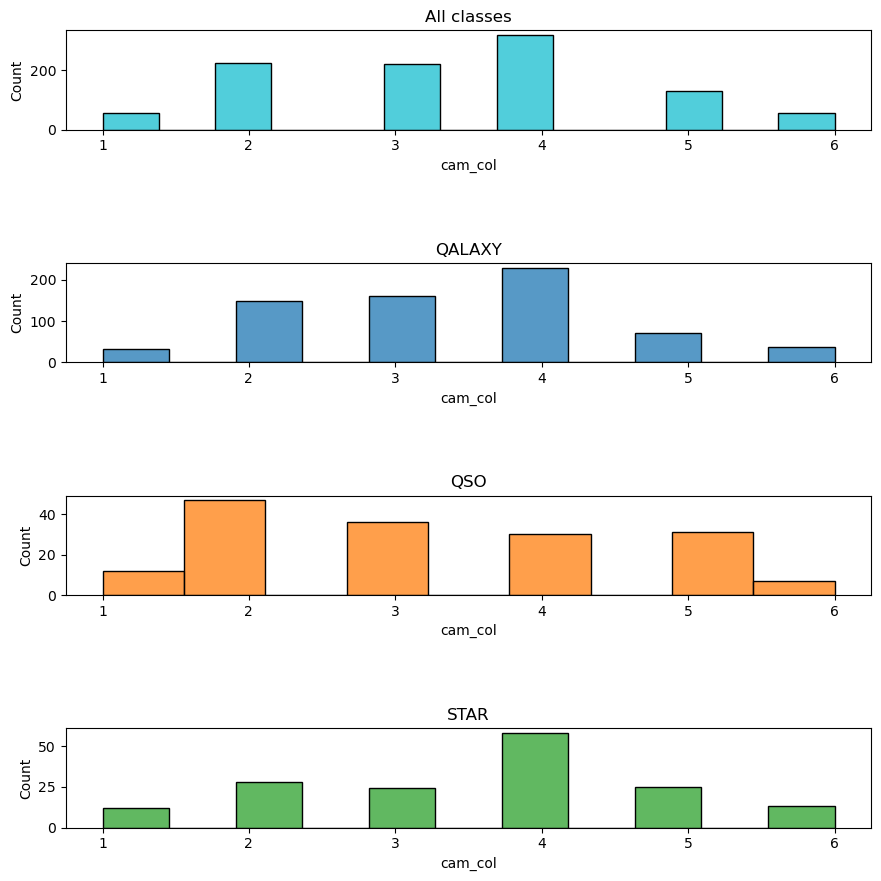

In [4]:
standard_distribution_info('cam_col')
df['cam_col'].value_counts()

All classes:
mediana = 4.0
średnia = 3.408
Q1 = 2.0 Q3 = 4.0
GALAXY:
mediana = 3.0
średnia = 3.400295420974889
Q1 = 2.0 Q3 = 4.0
QSO:
mediana = 3.0
średnia = 3.2576687116564416
Q1 = 2.0 Q3 = 4.0
STAR:
mediana = 4.0
średnia = 3.59375
Q1 = 2.75 Q3 = 4.0


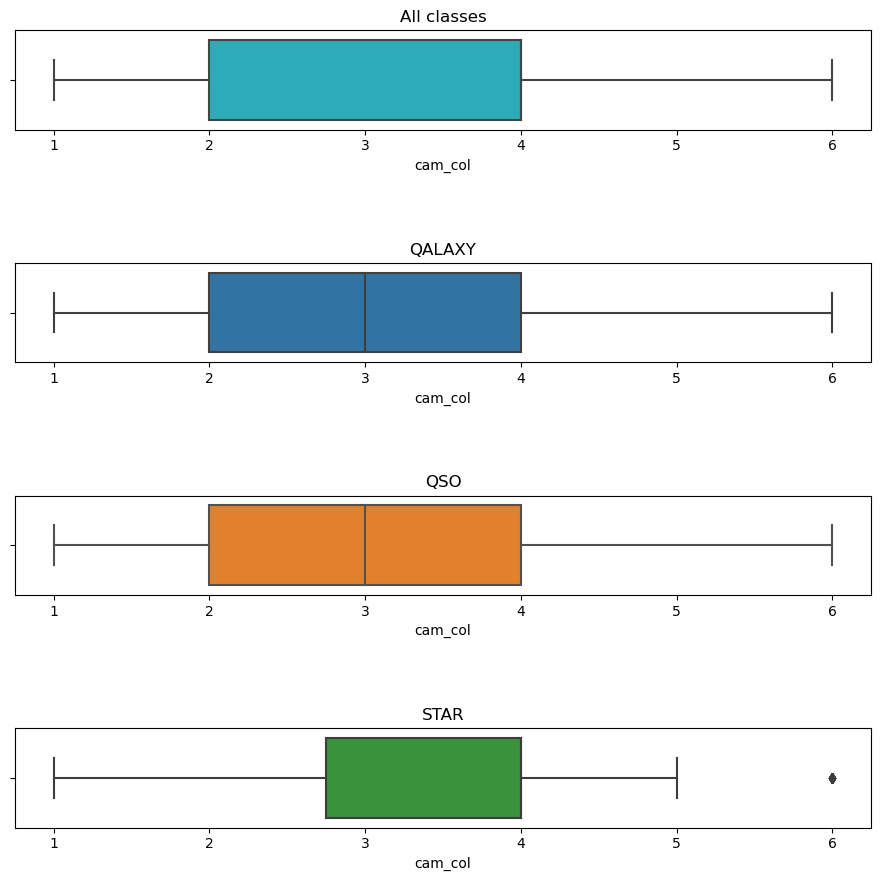

In [5]:
standard_boxplot_info('cam_col')

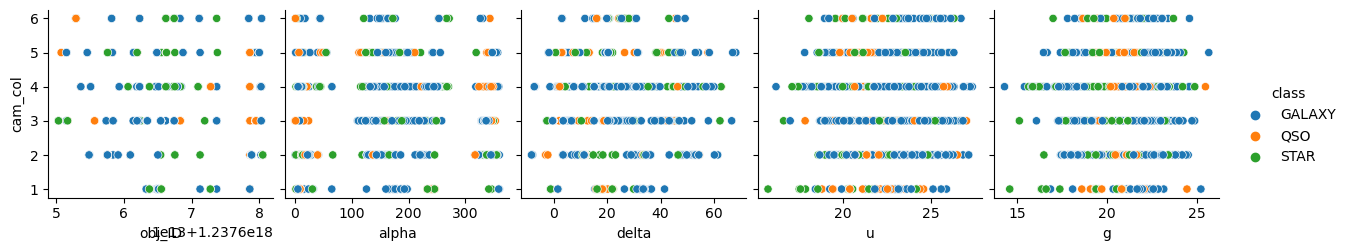

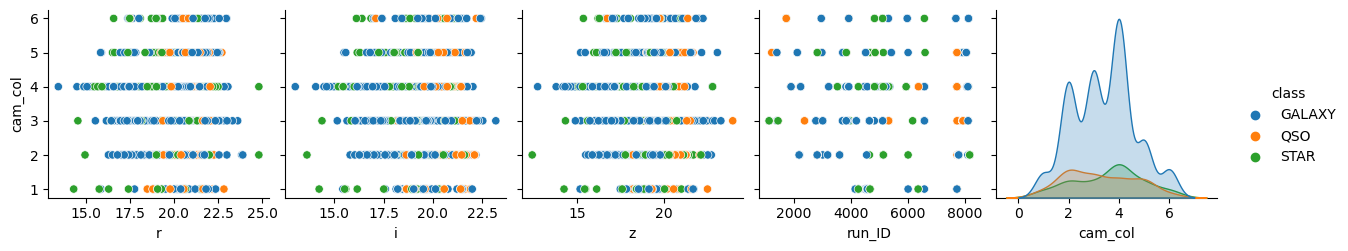

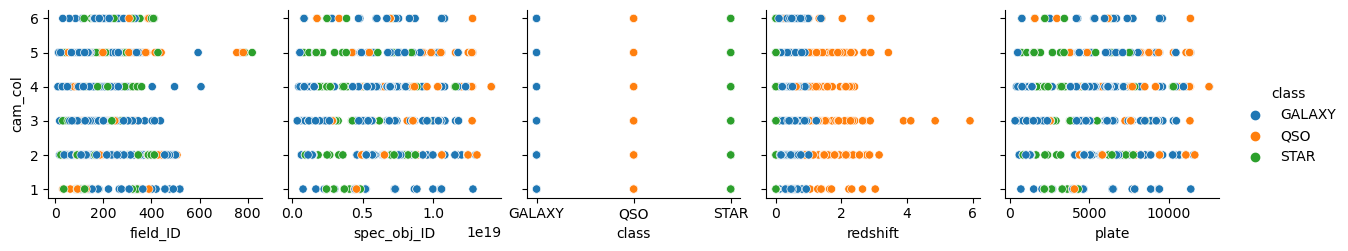

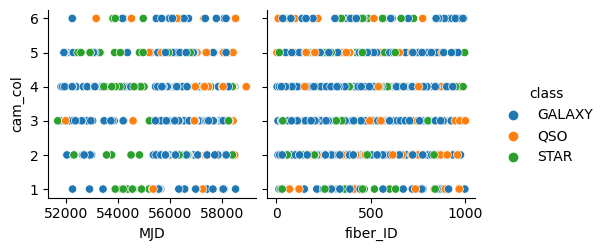

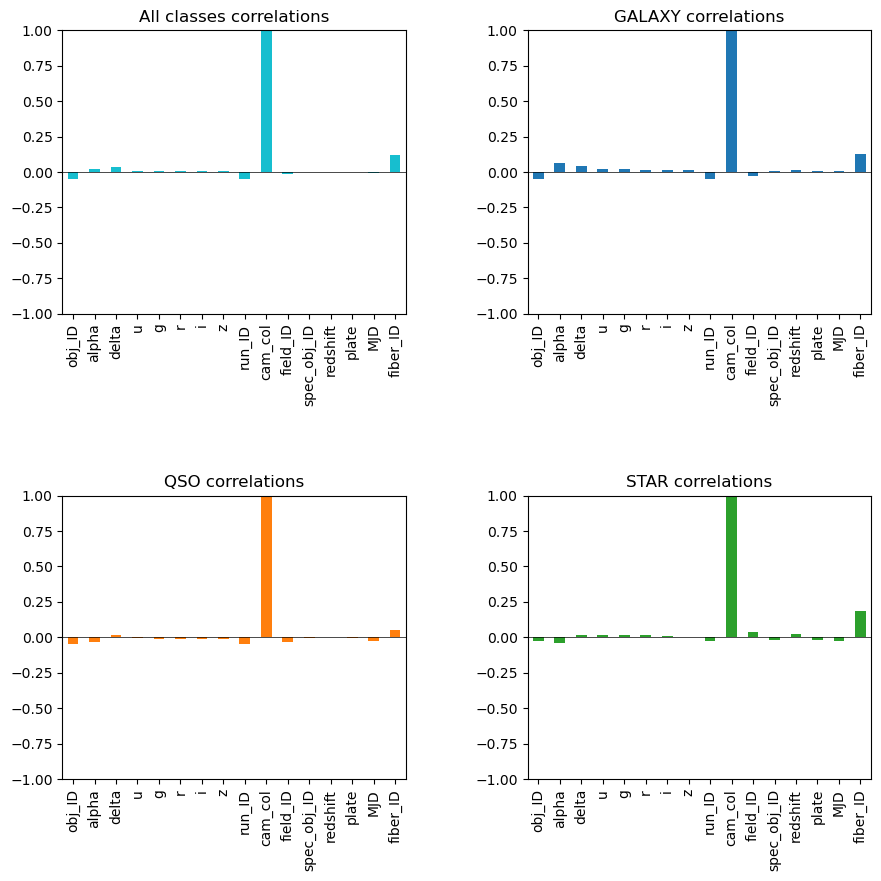

In [6]:
standard_correlation_visualisation('cam_col')

# field_ID
Field number to identify each field

field_ID
141    10
53      8
67      8
37      8
99      7
       ..
352     1
372     1
292     1
325     1
455     1
Name: count, Length: 373, dtype: int64

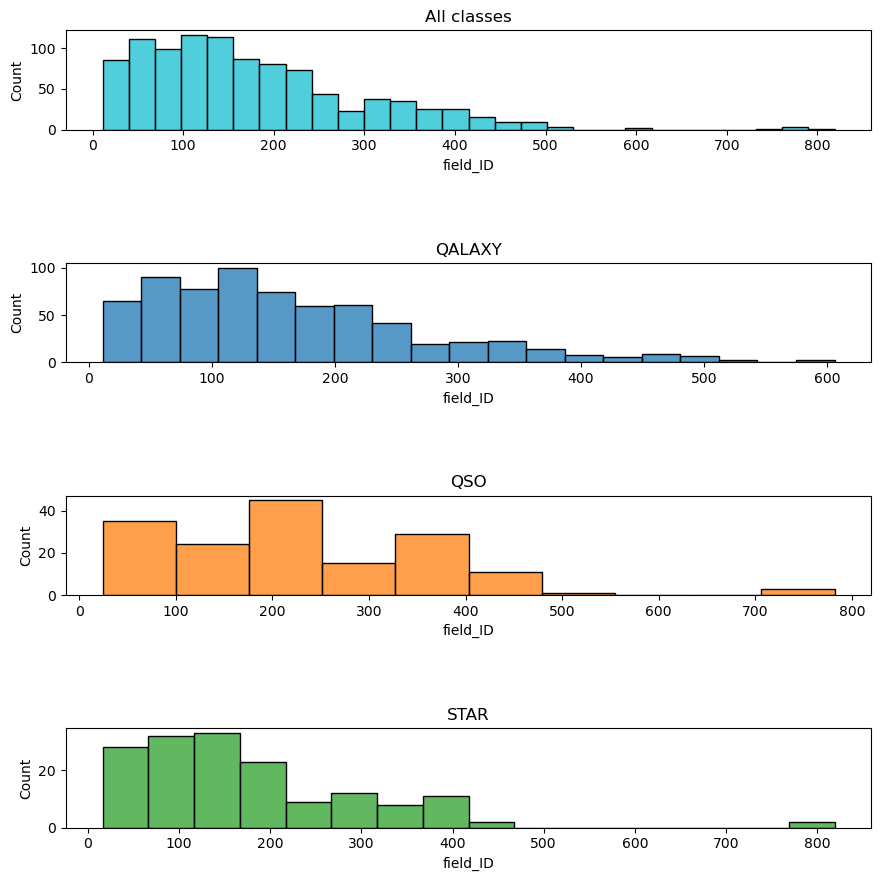

In [7]:
standard_distribution_info('field_ID')
df['field_ID'].value_counts()

All classes:
mediana = 147.0
średnia = 176.386
Q1 = 87.0 Q3 = 232.0
GALAXY:
mediana = 138.0
średnia = 164.5228951255539
Q1 = 79.0 Q3 = 232.0
QSO:
mediana = 194.0
średnia = 226.42331288343559
Q1 = 120.5 Q3 = 232.0
STAR:
mediana = 138.5
średnia = 175.60625
Q1 = 88.75 Q3 = 232.0


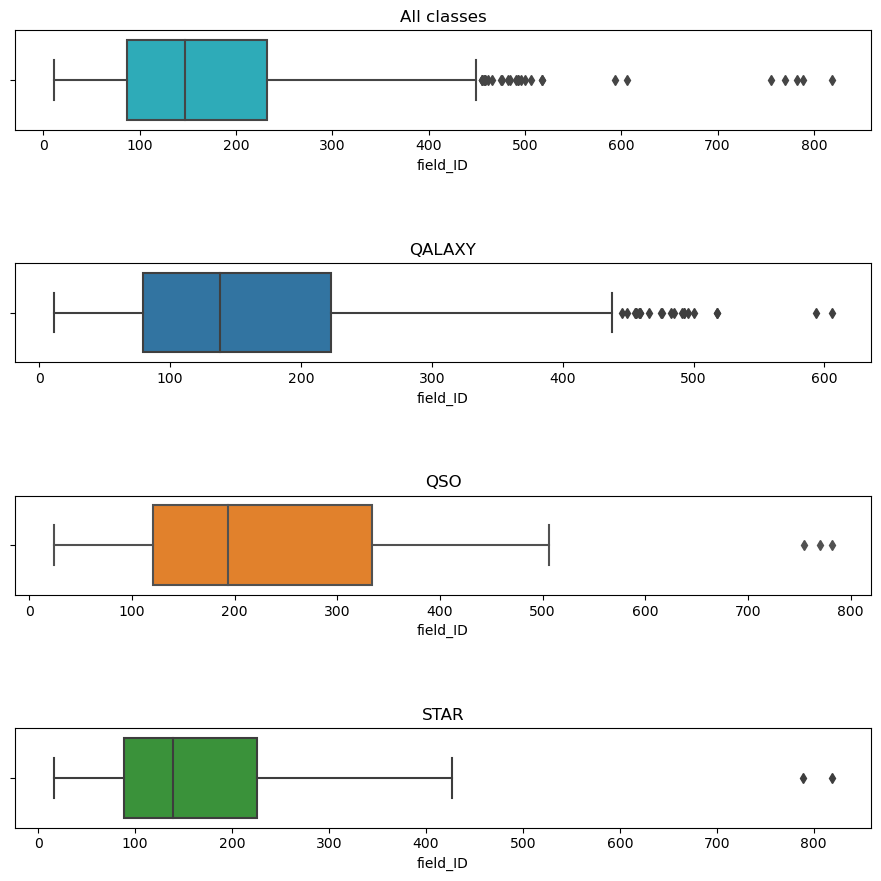

In [8]:
standard_boxplot_info('field_ID')

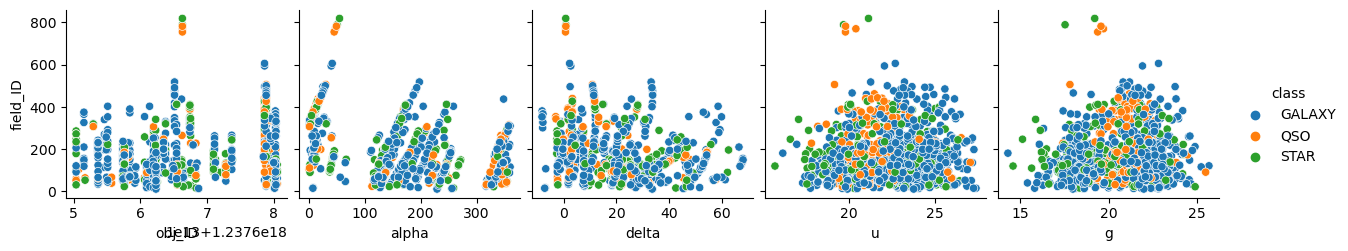

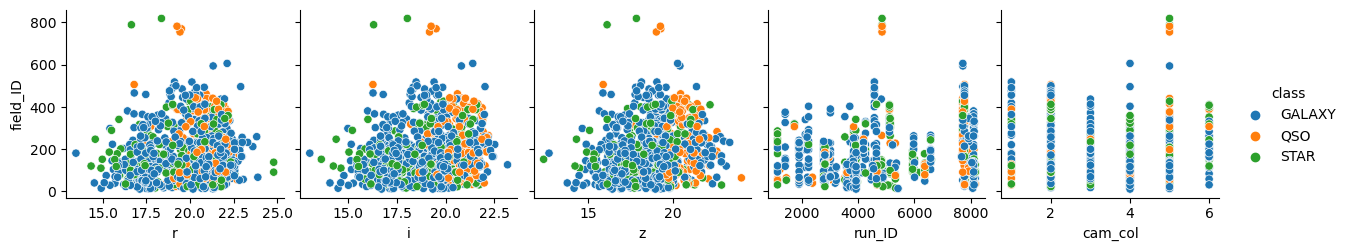

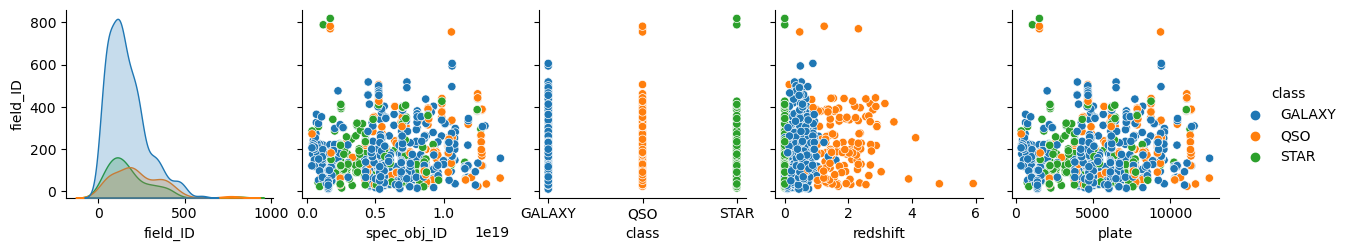

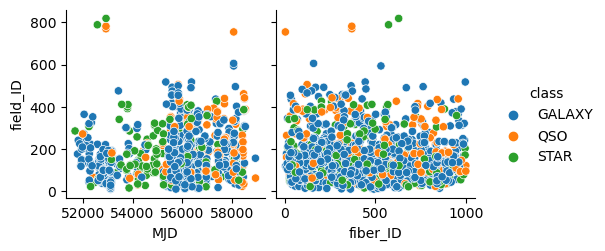

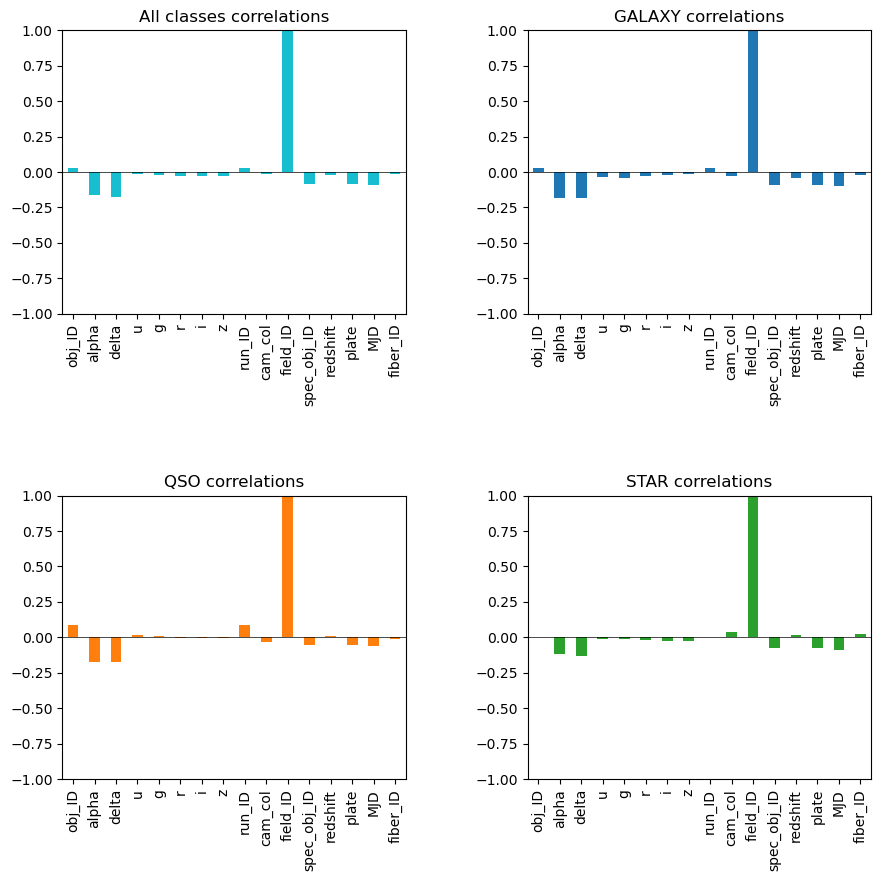

In [9]:
standard_correlation_visualisation('field_ID')

# spec_obj_ID
Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

spec_obj_ID
6.543777e+18    1
3.017471e+18    1
1.165336e+18    1
1.029877e+19    1
1.561765e+18    1
               ..
8.561587e+18    1
6.765571e+18    1
5.540970e+17    1
1.704714e+18    1
5.322136e+18    1
Name: count, Length: 1000, dtype: int64

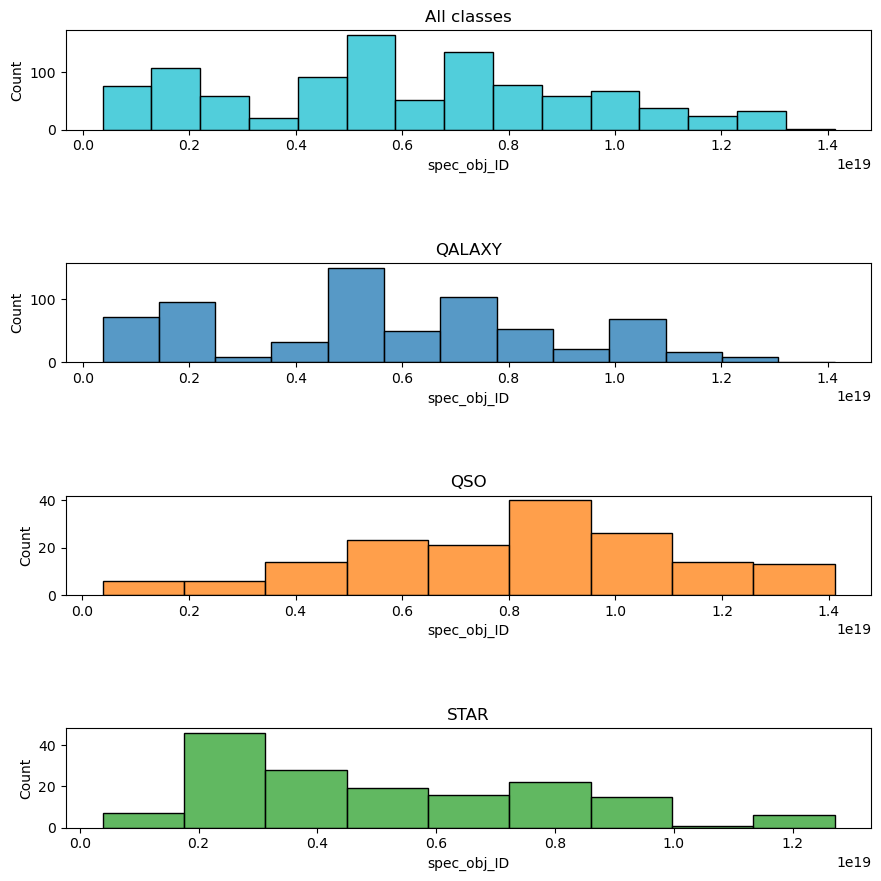

In [10]:
standard_distribution_info('spec_obj_ID')
df['spec_obj_ID'].value_counts()

All classes:
mediana = 5.683600558608636e+18
średnia = 6.017713551874072e+18
Q1 = 3.660086480447054e+18 Q3 = 8.527976266229635e+18
GALAXY:
mediana = 5.600334264954804e+18
średnia = 5.697986952363951e+18
Q1 = 2.641524521575672e+18 Q3 = 8.527976266229635e+18
QSO:
mediana = 8.568114625975179e+18
średnia = 8.113539291053375e+18
Q1 = 5.688722630557063e+18 Q3 = 8.527976266229635e+18
STAR:
mediana = 4.3455831276511785e+18
średnia = 5.235434254262357e+18
Q1 = 2.7008330039317233e+18 Q3 = 8.527976266229635e+18


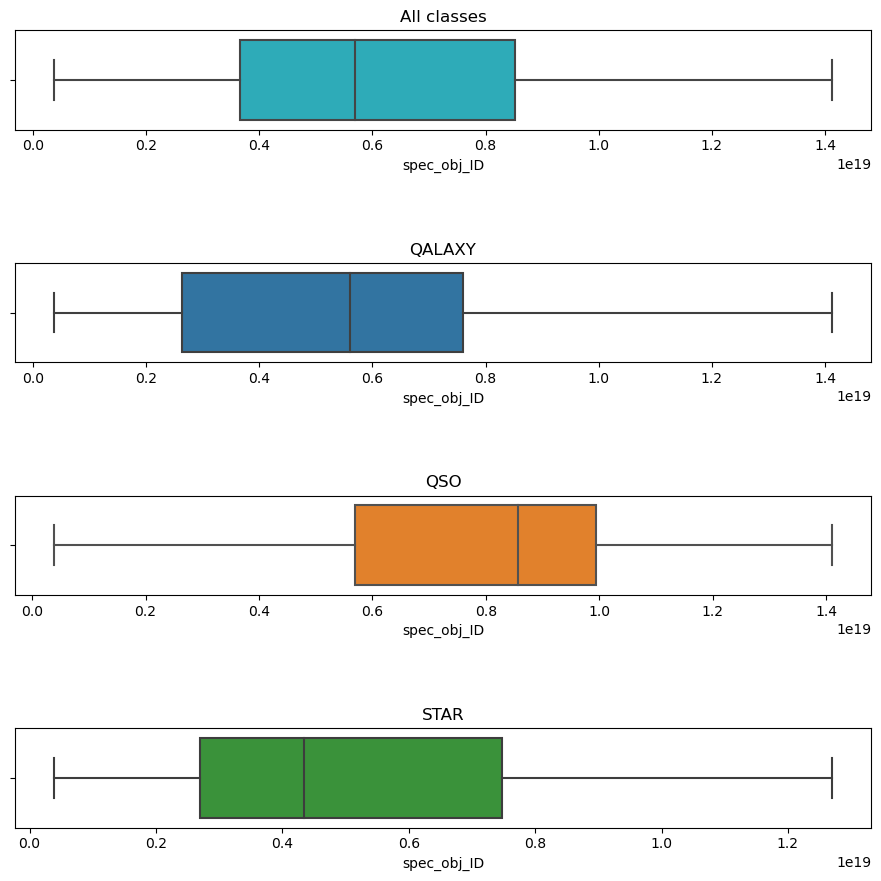

In [11]:
standard_boxplot_info('spec_obj_ID')

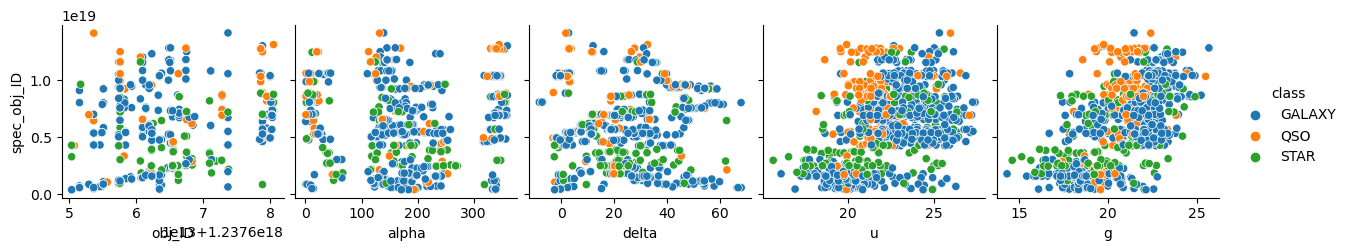

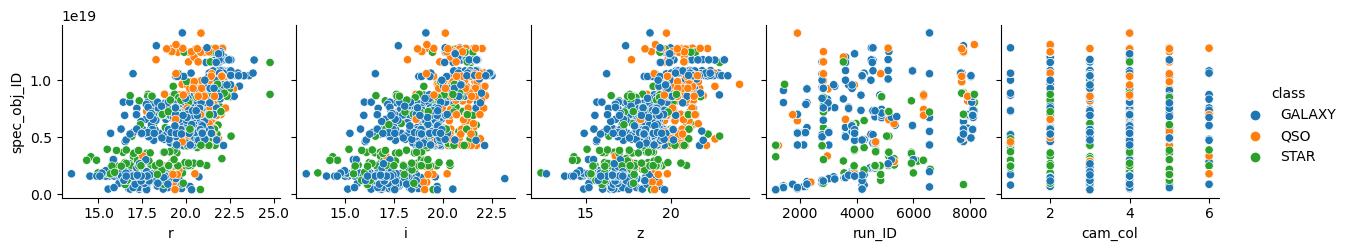

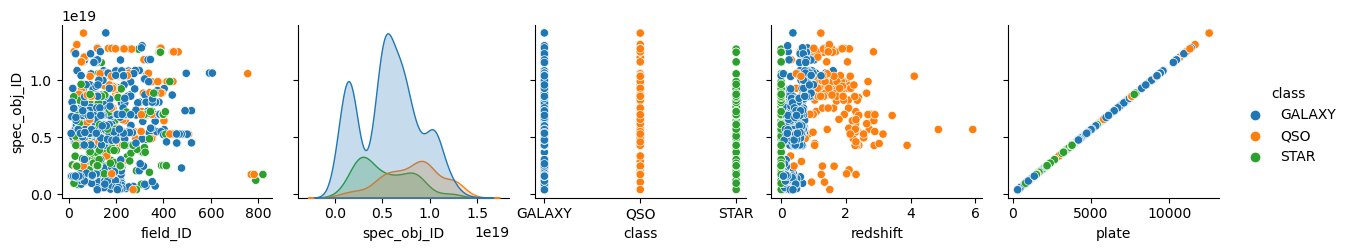

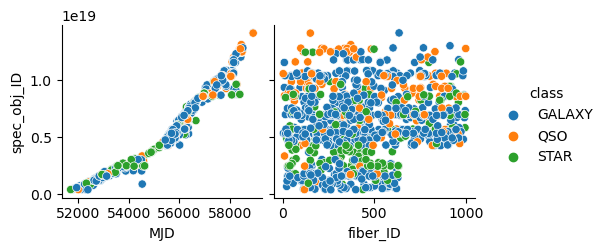

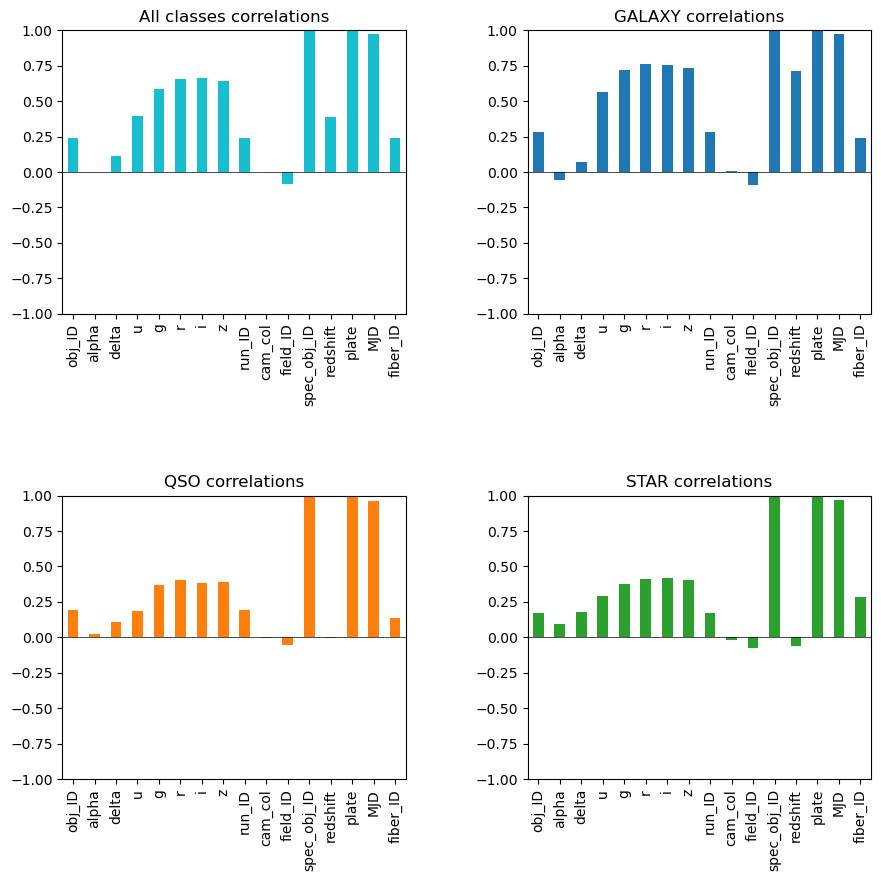

In [12]:
standard_correlation_visualisation('spec_obj_ID')

# class
object class (galaxy, star or quasar object)

class
GALAXY    677
QSO       163
STAR      160
Name: count, dtype: int64

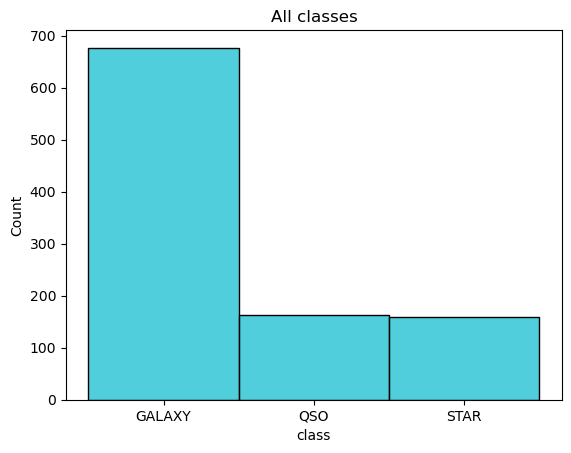

In [13]:
sns.histplot(data=df, x='class', color='#17becf').set(title='All classes')
df['class'].value_counts()

# redshift
redshift value based on the increase in wavelength

redshift
 0.000000    5
 0.634794    1
 0.707545    1
 0.142411    1
 0.704735    1
            ..
-0.000551    1
 0.680218    1
 0.567542    1
 0.204091    1
 0.504888    1
Name: count, Length: 996, dtype: int64

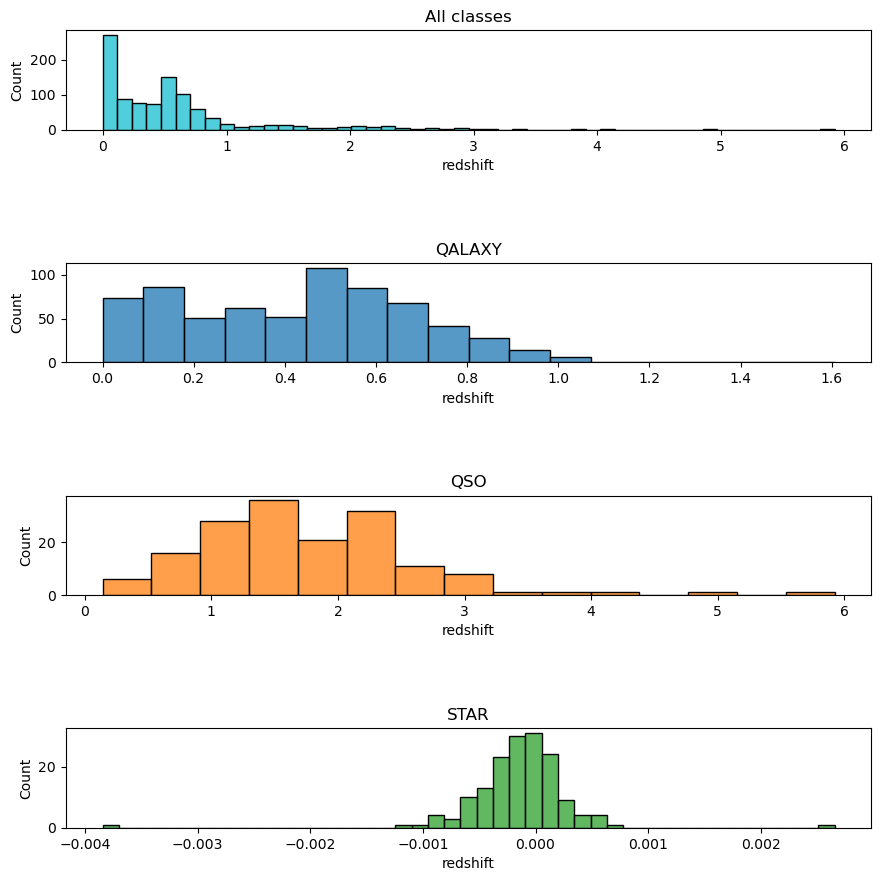

In [14]:
standard_distribution_info('redshift')
df['redshift'].value_counts()

All classes:
mediana = 0.46611285
średnia = 0.575876879453859
Q1 = 0.0968388375 Q3 = 0.694190125
GALAXY:
mediana = 0.4689722
średnia = 0.4316397343993648
Q1 = 0.2000235 Q3 = 0.694190125
QSO:
mediana = 1.621598
średnia = 1.7403691012269942
Q1 = 1.194782 Q3 = 0.694190125
STAR:
mediana = -0.00011299835
średnia = -0.00014615146569374996
Q1 = -0.0003340002 Q3 = 0.694190125


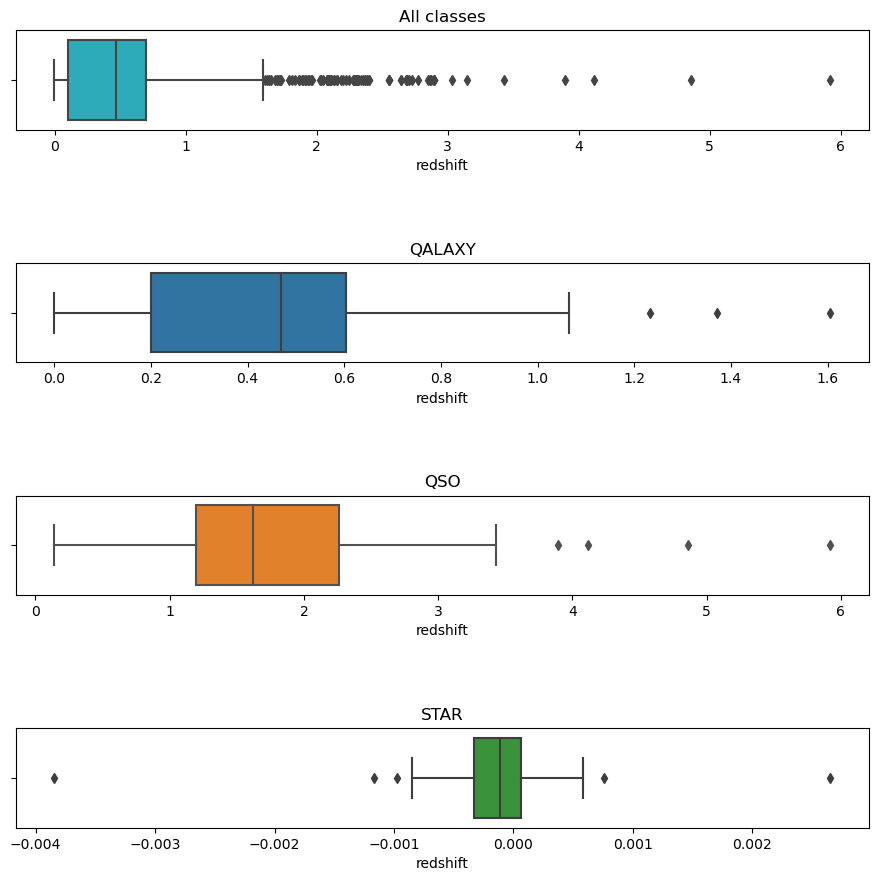

In [15]:
standard_boxplot_info('redshift')

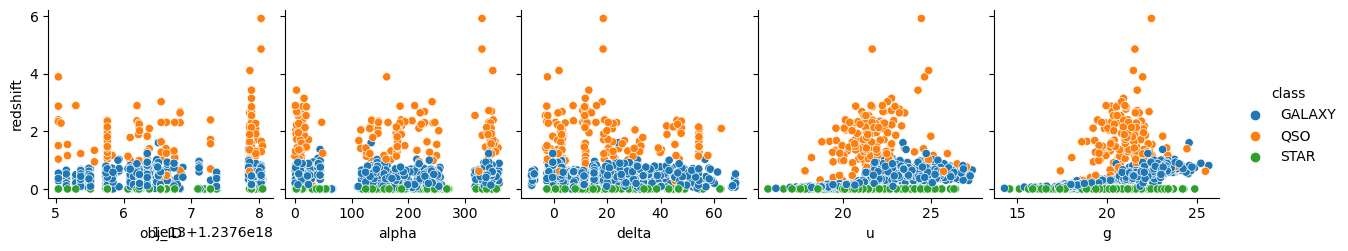

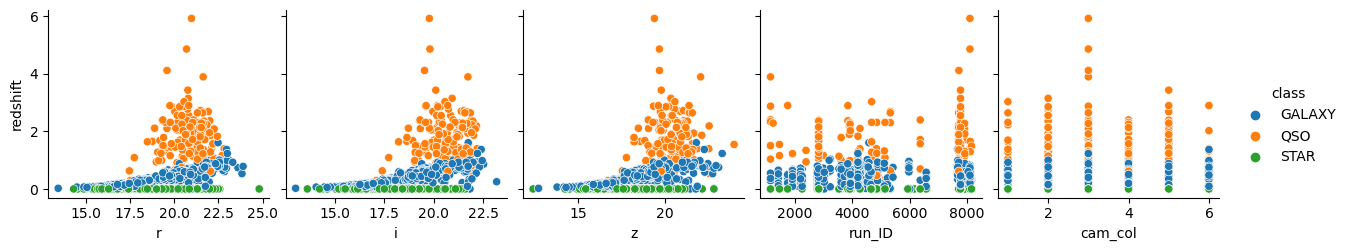

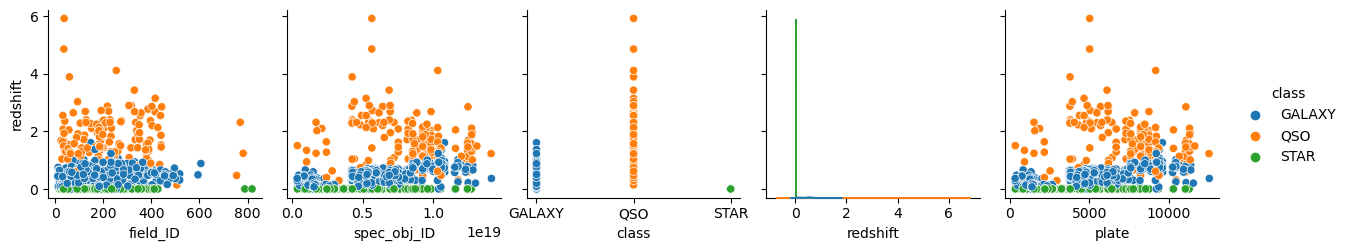

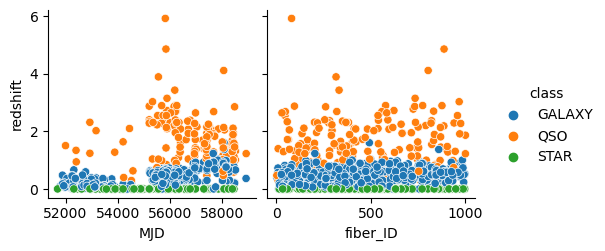

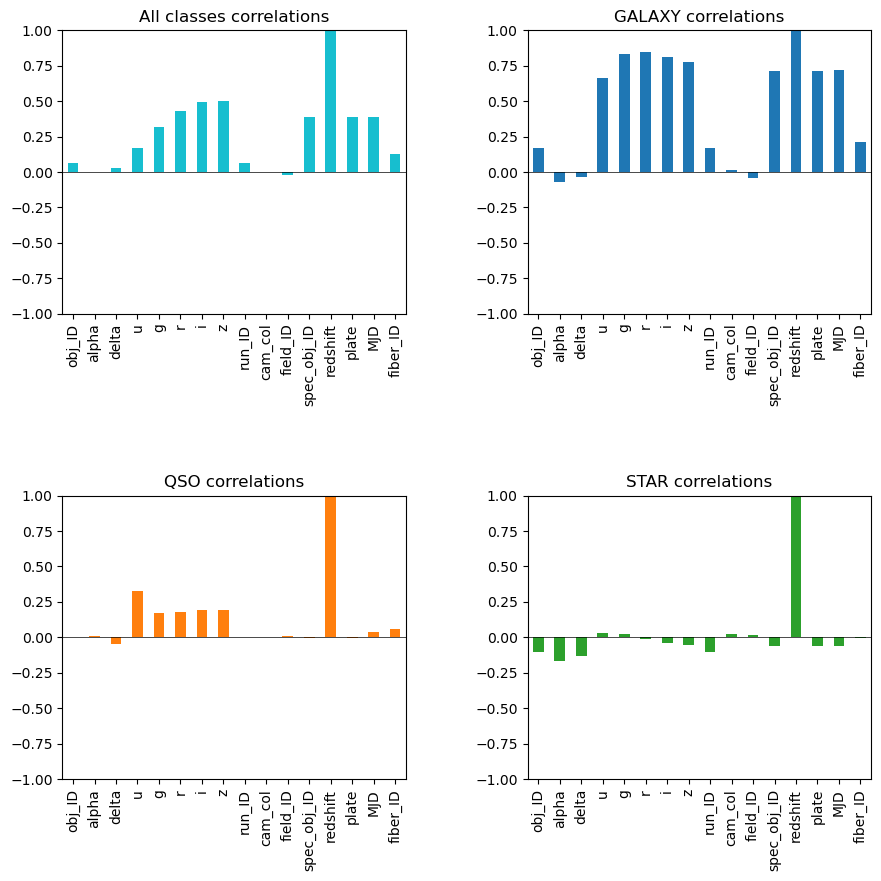

In [16]:
standard_correlation_visualisation('redshift')

# plate 
plate ID, identifies each plate in SDSS

plate
11042    8
4361     8
6128     7
10445    7
1393     7
        ..
571      1
1033     1
3779     1
9316     1
8491     1
Name: count, Length: 640, dtype: int64

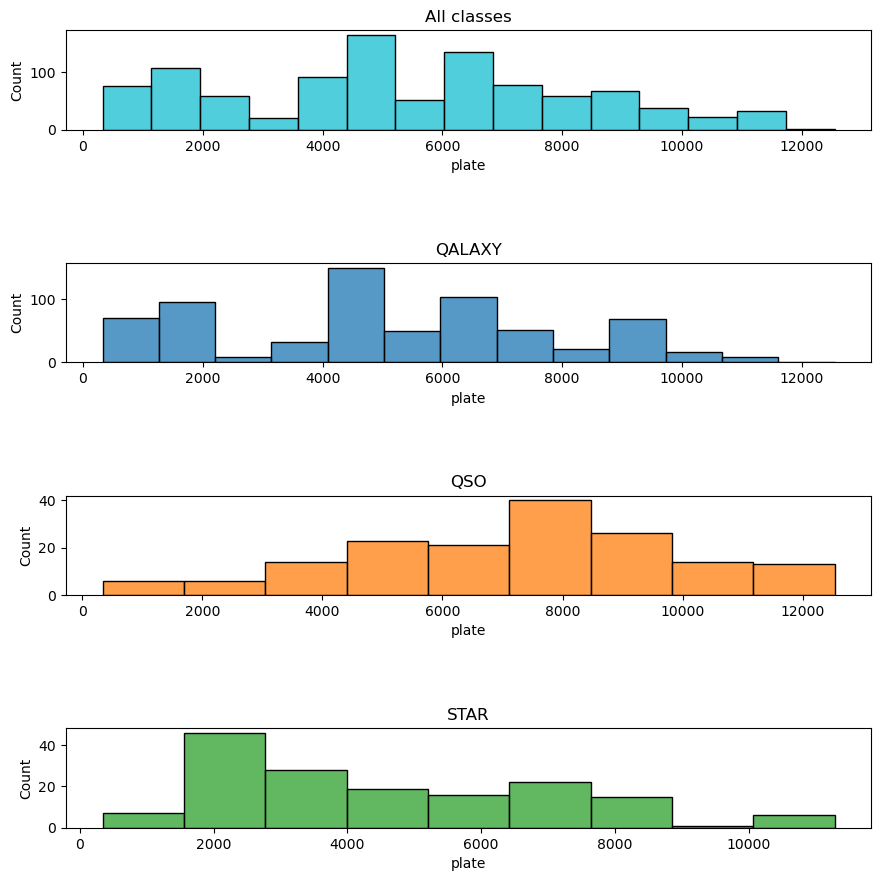

In [17]:
standard_distribution_info('plate')
df['plate'].value_counts()

All classes:
mediana = 5048.0
średnia = 5344.695
Q1 = 3250.75 Q3 = 7574.25
GALAXY:
mediana = 4974.0
średnia = 5060.722304283604
Q1 = 2346.0 Q3 = 7574.25
QSO:
mediana = 7610.0
średnia = 7206.1533742331285
Q1 = 5052.5 Q3 = 7574.25
STAR:
mediana = 3859.5
średnia = 4649.89375
Q1 = 2398.75 Q3 = 7574.25


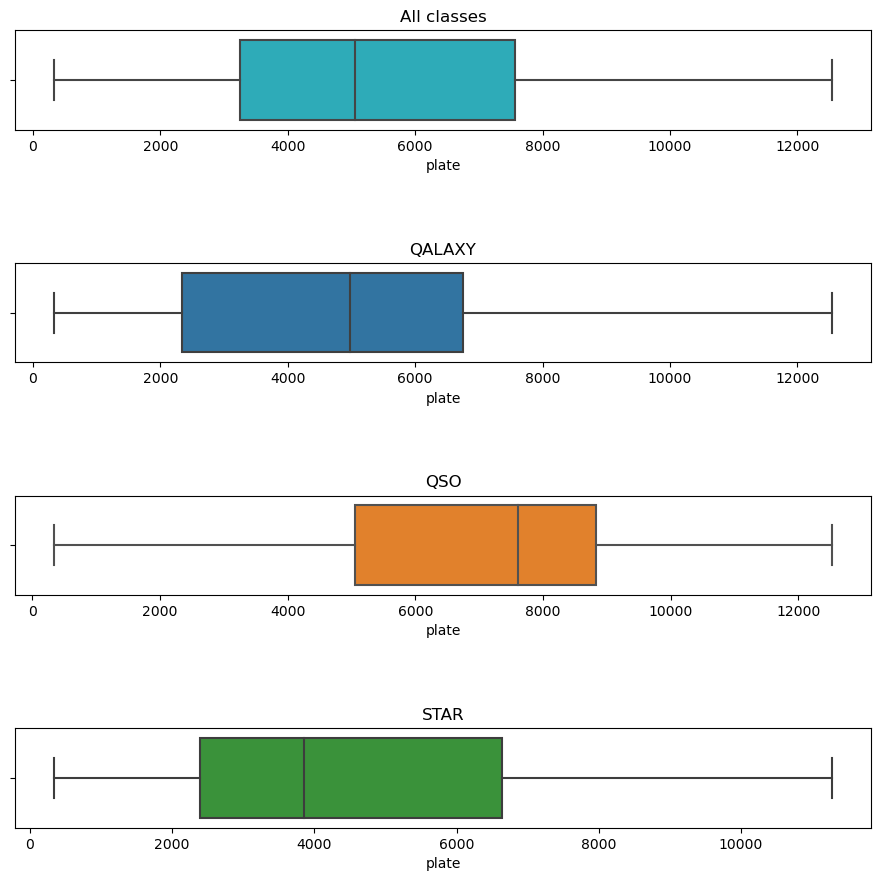

In [18]:
standard_boxplot_info('plate')

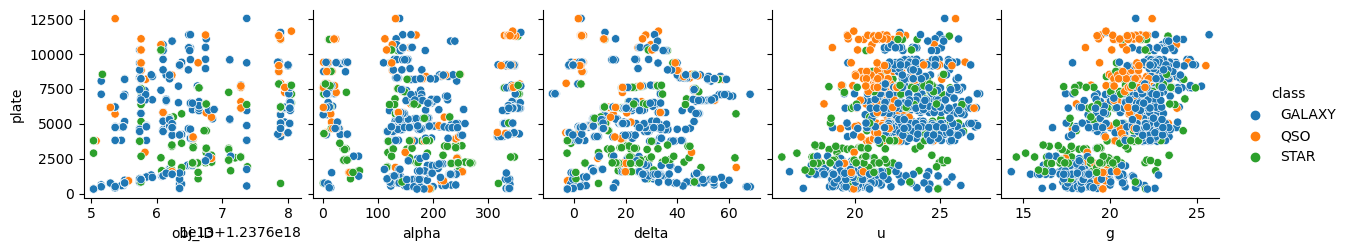

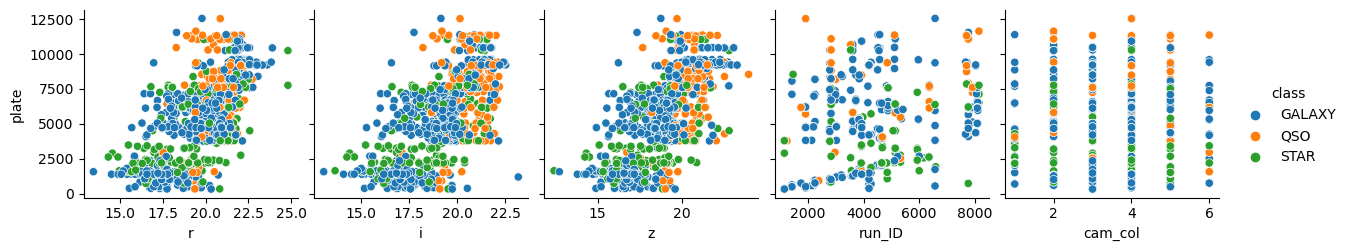

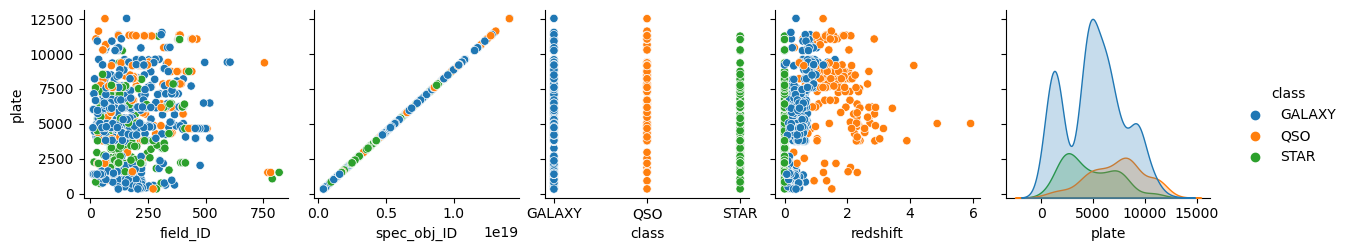

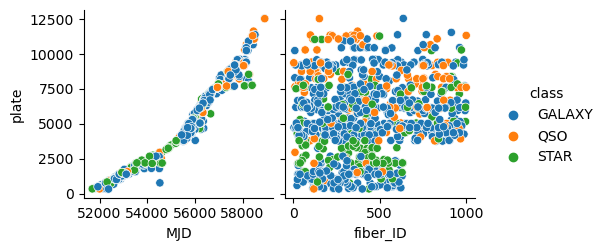

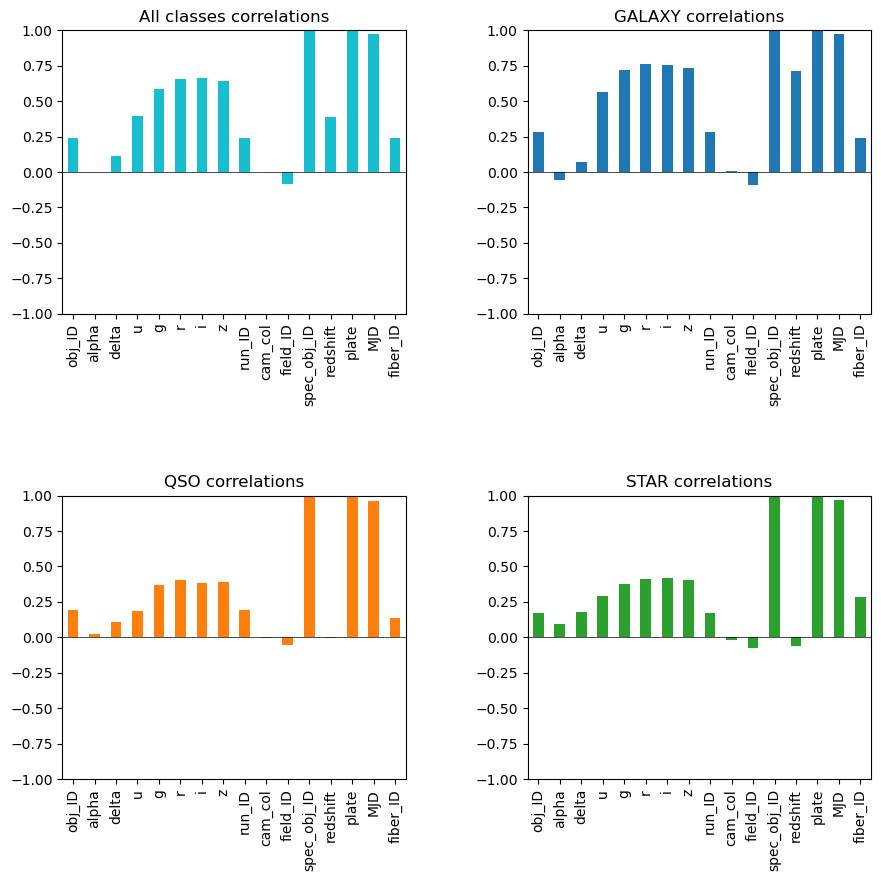

In [19]:
standard_correlation_visualisation('plate')

# MJD
Modified Julian Date, used to indicate when a given piece of SDSS data was taken

MJD
55831    11
56187    10
58462     9
52822     7
58158     7
         ..
55929     1
52401     1
58171     1
56666     1
57488     1
Name: count, Length: 522, dtype: int64

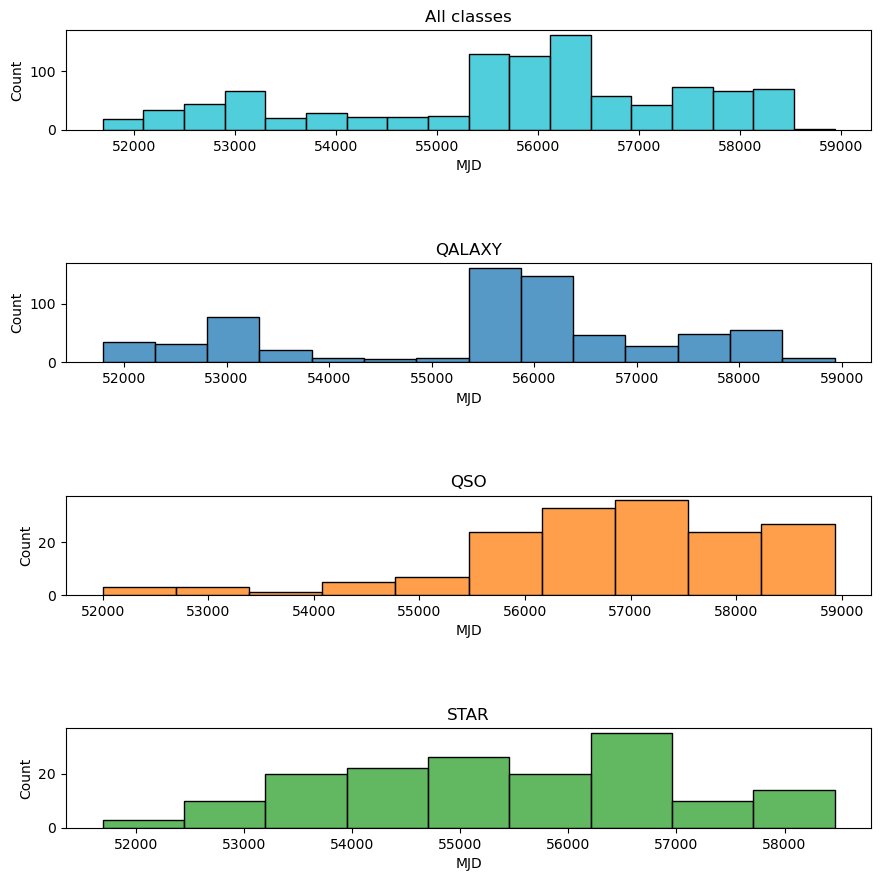

In [20]:
standard_distribution_info('MJD')
df['MJD'].value_counts()

All classes:
mediana = 55945.5
średnia = 55732.153
Q1 = 54882.0 Q3 = 56944.0
GALAXY:
mediana = 55863.0
średnia = 55546.9423929099
Q1 = 54180.0 Q3 = 56944.0
QSO:
mediana = 56957.0
średnia = 56793.89570552147
Q1 = 56013.0 Q3 = 56944.0
STAR:
mediana = 55289.5
średnia = 55434.175
Q1 = 54226.5 Q3 = 56944.0


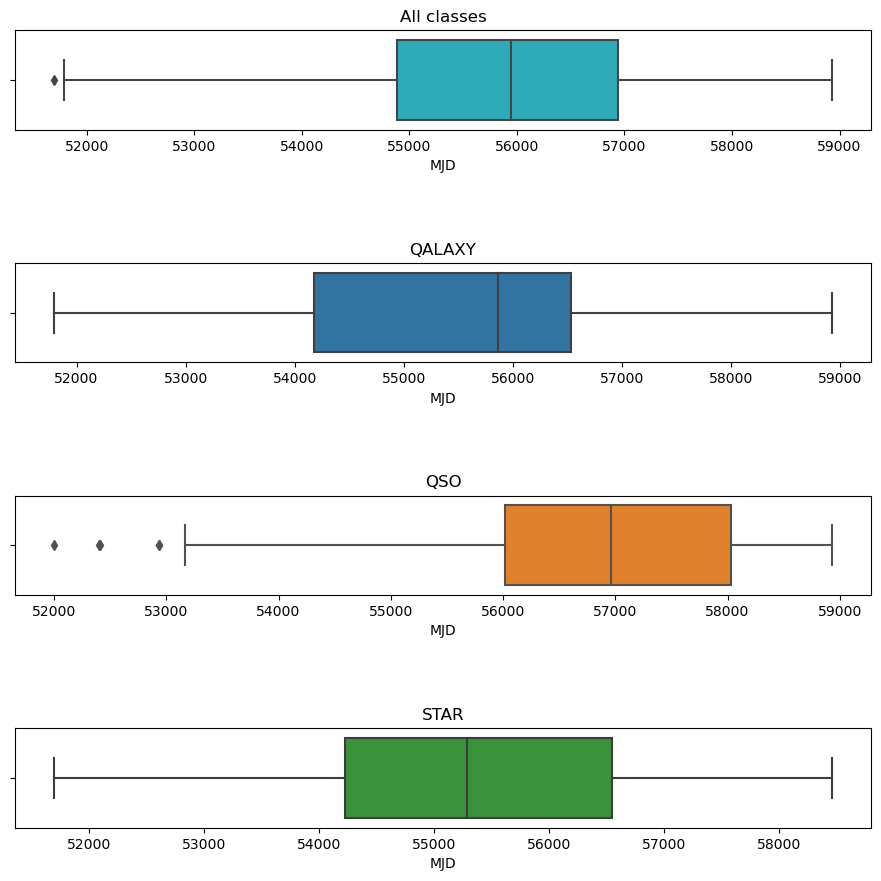

In [21]:
standard_boxplot_info('MJD')

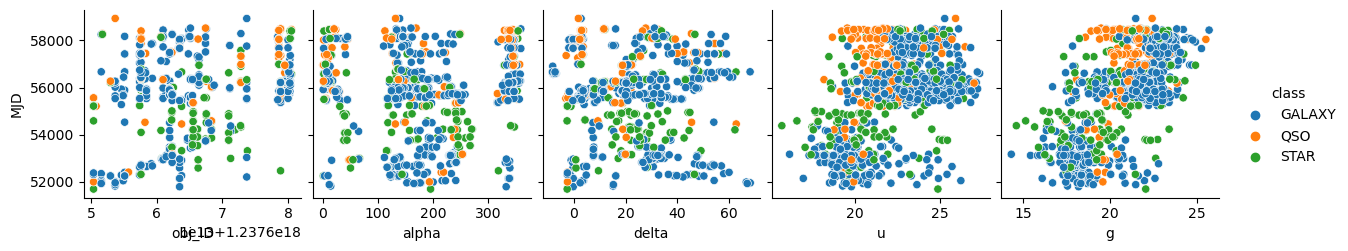

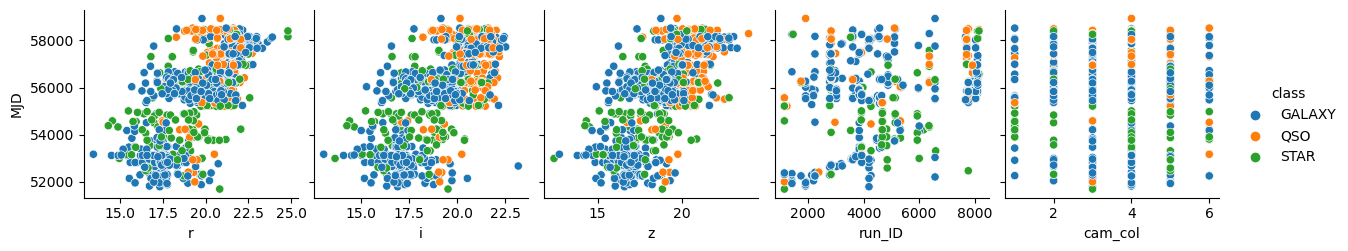

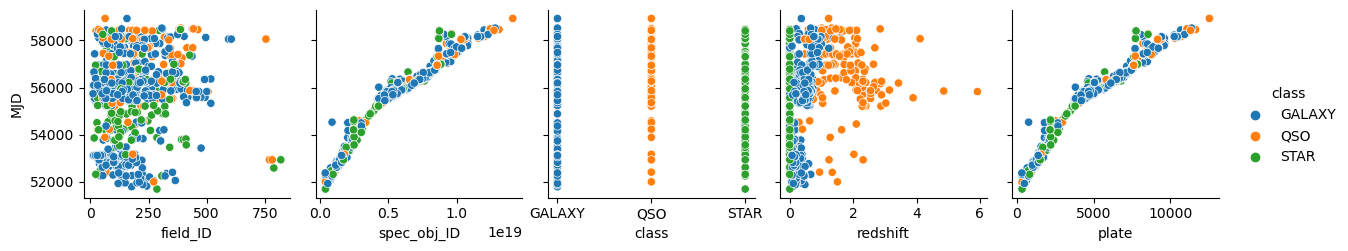

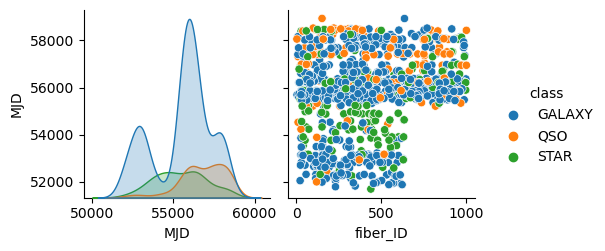

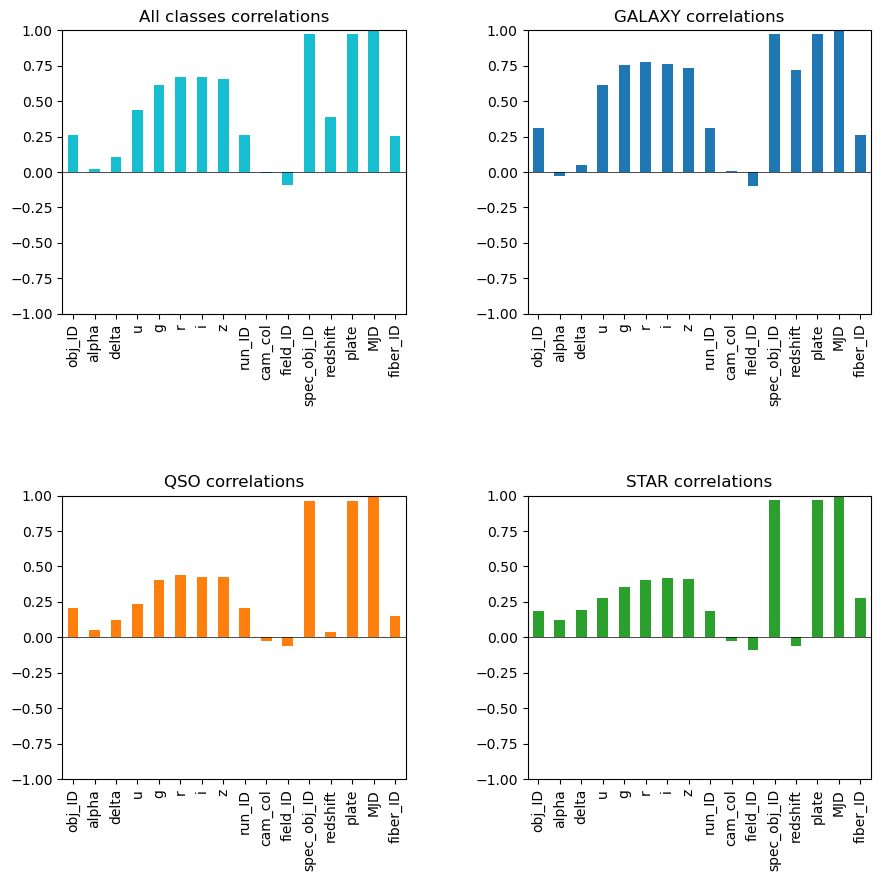

In [22]:
standard_correlation_visualisation('MJD')

# fiber_ID
fiber ID that identifies the fiber that pointed the light at the focal plane in each observati

fiber_ID
350    6
202    6
842    5
492    5
573    5
      ..
765    1
75     1
415    1
964    1
263    1
Name: count, Length: 617, dtype: int64

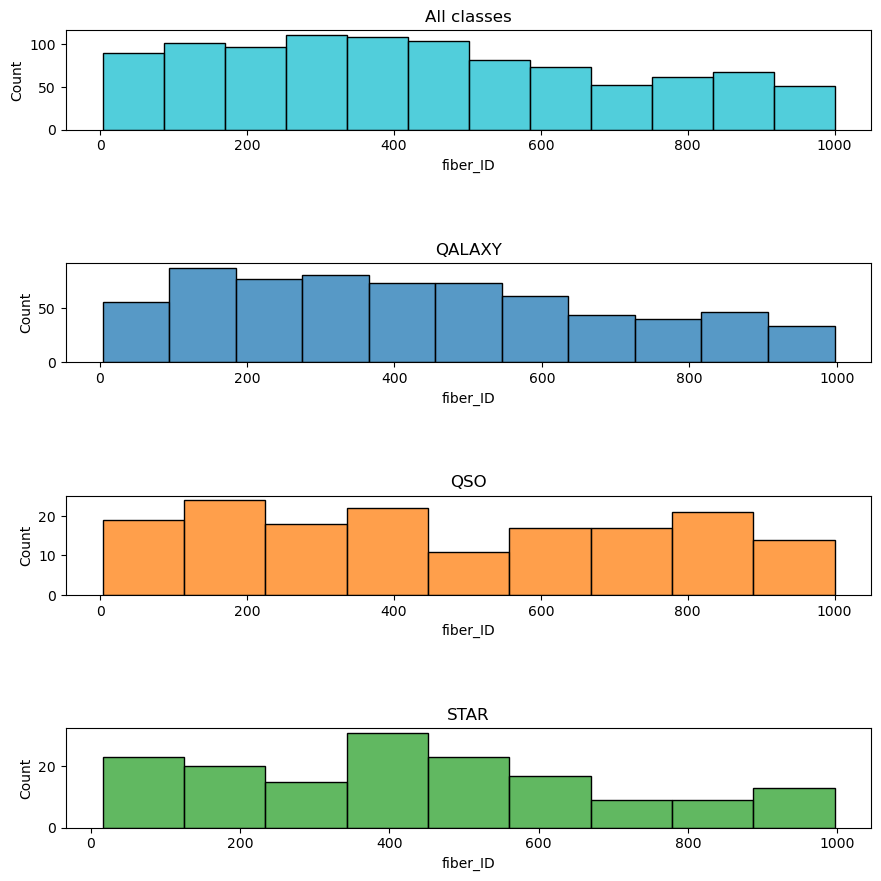

In [23]:
standard_distribution_info('fiber_ID')
df['fiber_ID'].value_counts()

All classes:
mediana = 412.5
średnia = 443.299
Q1 = 212.75 Q3 = 643.0
GALAXY:
mediana = 408.0
średnia = 436.87887740029544
Q1 = 211.0 Q3 = 643.0
QSO:
mediana = 422.0
średnia = 479.3558282208589
Q1 = 216.0 Q3 = 643.0
STAR:
mediana = 424.5
średnia = 433.73125
Q1 = 209.75 Q3 = 643.0


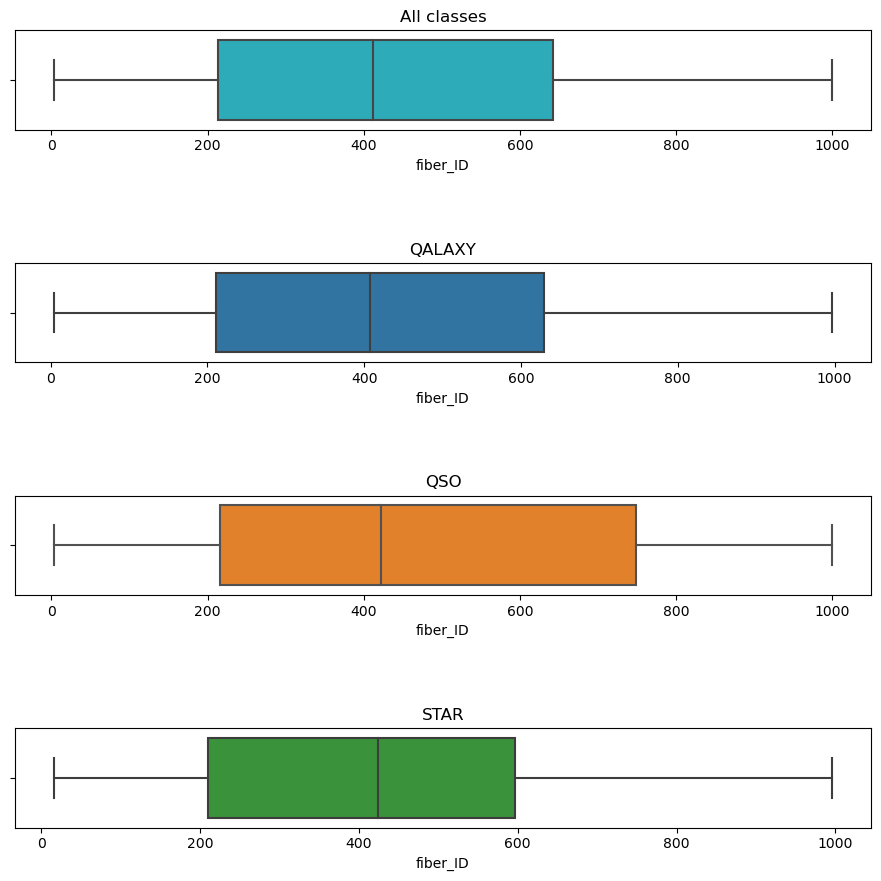

In [24]:
standard_boxplot_info('fiber_ID')

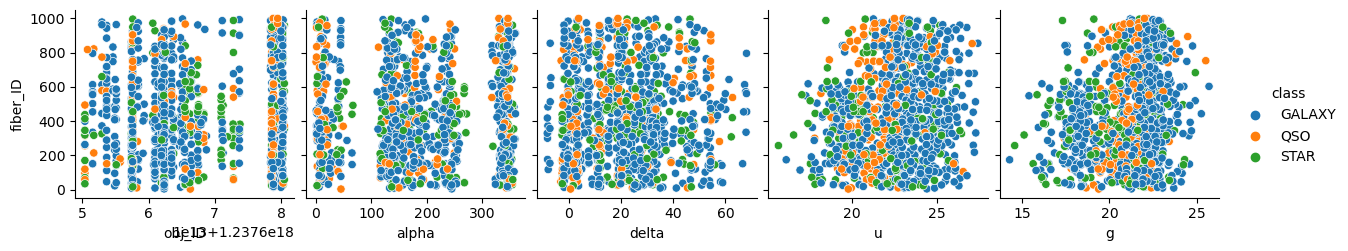

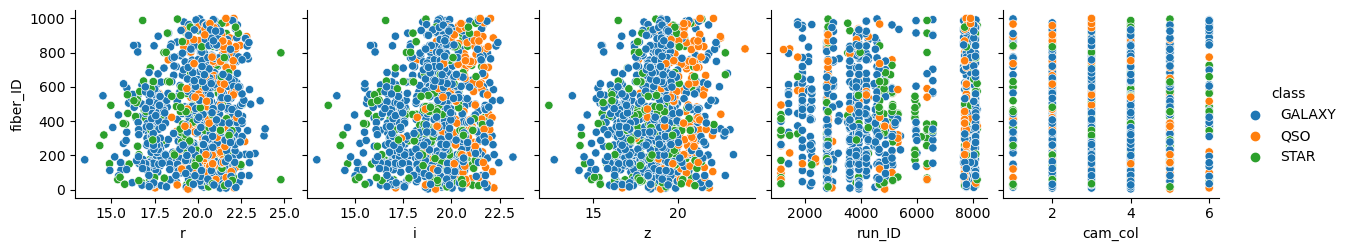

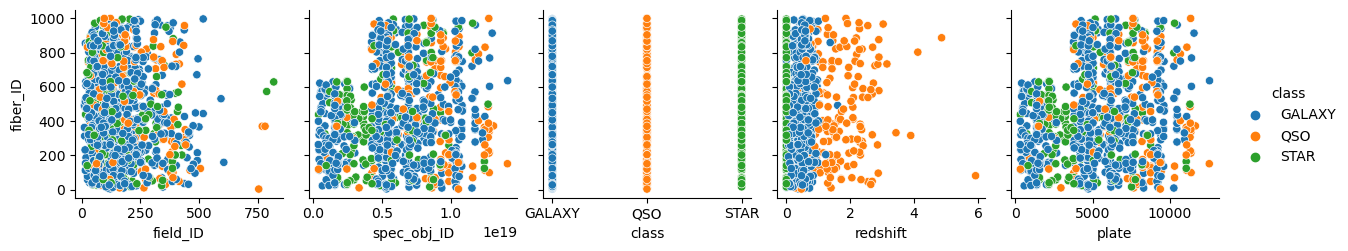

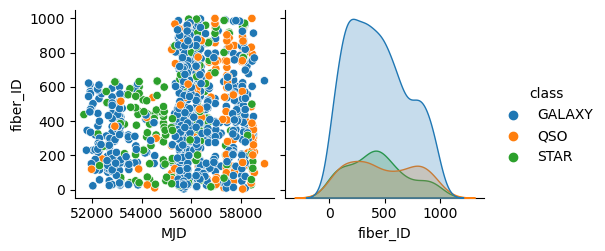

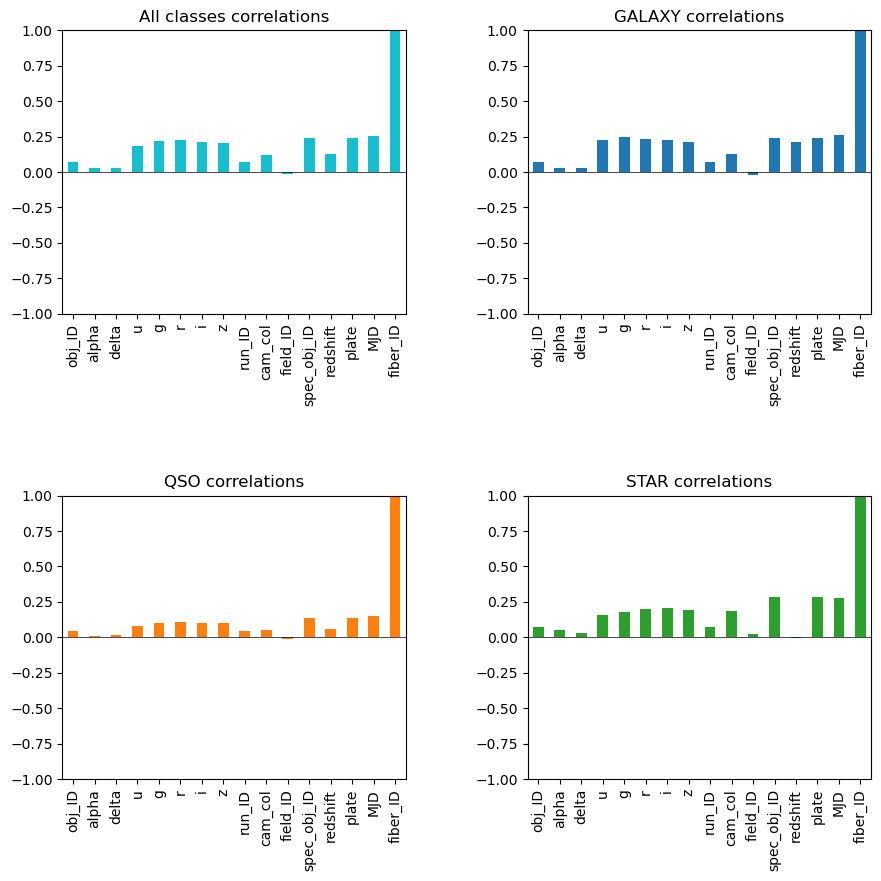

In [25]:
standard_correlation_visualisation('fiber_ID')